In [2]:
import pandas as pd
df = pd.read_excel(r"C:\Users\DELL\Documents\heart.xlsx")
X = df.drop("target",axis=1)
y = df["target"]
print(X.head())
print(y.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  
0   2     3  
1   0     3  
2   0     3  
3   1     3  
4   3     2  
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


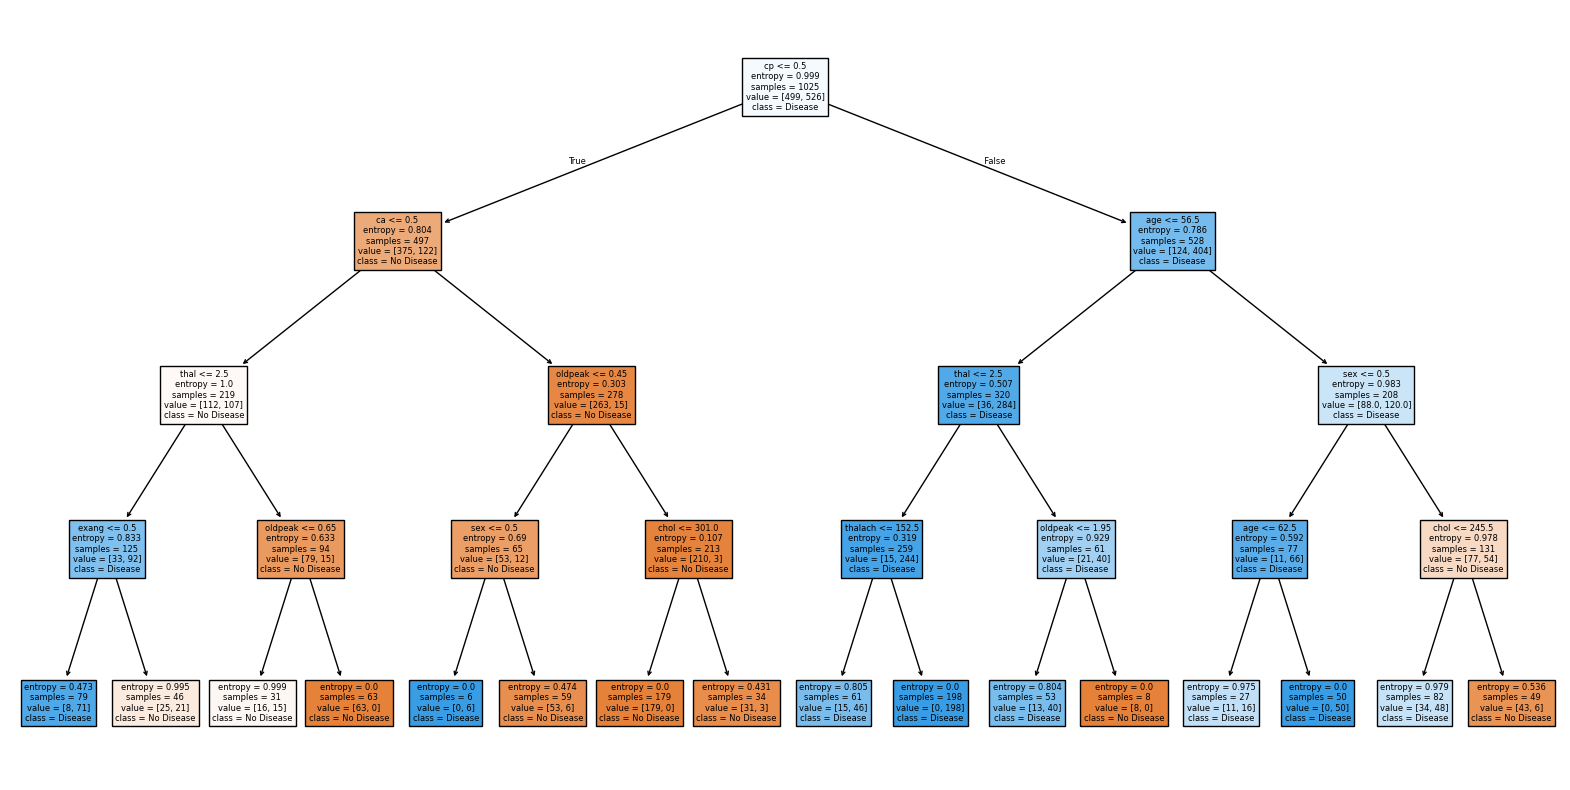

In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
dt = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)
dt.fit(X, y)
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.show()

In [4]:
dt_overfit = DecisionTreeClassifier(random_state=42)
dt_overfit.fit(X, y)
print("Train Accuracy (overfit):", dt_overfit.score(X, y))
dt_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_pruned.fit(X, y)
print("Train Accuracy (pruned):", dt_pruned.score(X, y))

Train Accuracy (overfit): 1.0
Train Accuracy (pruned): 0.8702439024390244


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)
dt_acc = dt.score(X_test, y_test)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_acc = rf.score(X_test, y_test)
print("Decision Tree Accuracy:", dt_acc)
print("Random Forest Accuracy:", rf_acc)

Decision Tree Accuracy: 0.8344155844155844
Random Forest Accuracy: 0.9805194805194806


In [7]:
importances = rf.feature_importances_
feat_importances = pd.DataFrame({
"Feature": X.columns,
"Importance": importances
}).sort_values(by="Importance", ascending=False)
print(feat_importances)


     Feature  Importance
2         cp    0.132274
7    thalach    0.125039
11        ca    0.122912
9    oldpeak    0.122852
12      thal    0.113005
0        age    0.085554
4       chol    0.079872
3   trestbps    0.068356
10     slope    0.051335
8      exang    0.042210
1        sex    0.028721
6    restecg    0.018155
5        fbs    0.009714


In [9]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf,X,y,cv=5)
print("Cross_Validation_score :",scores)
print("Cross_Validation_mean:", scores.mean())

Cross_Validation_score : [1.         1.         1.         1.         0.98536585]
Cross_Validation_mean: 0.9970731707317073
